In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import random
import os

from IPython.display import display, Math, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
class KMeans():
    def __init__(self,k):
        self.k = k
        self.DMeasure = []
    
    def InitiliseCentroids(self,X):
        # Assigning Random k-points as Clusters
        N = X.shape[1]
        Ind = np.random.randint(N,size=(self.k,))
        G = []
        for i in Ind:
            G.append(X[:,i])
            
        return np.transpose(G)
    
    def DistortionMeasure(self,r,X,Centroids):
        # Calculating Distortion Measure
        """
        Distances: Distance of Each Data Point from each Centriod. Shape:(n,k)
        """
        Distances = np.linalg.norm((np.repeat(np.expand_dims(X,axis=1),self.k,axis=1)- np.expand_dims(Centroids,axis=-1)), axis=0)
        J = np.sum(np.multiply(Distances,r))
        
        return J
    
    def ClusterData(self,X,Centroids):
        # Assigning Cluster to Each Point in X
        N = X.shape[1]
        r = np.zeros((self.k,N))
        
        Distances = np.linalg.norm((np.repeat(np.expand_dims(X,axis=1),self.k,axis=1)- np.expand_dims(Centroids,axis=-1)), axis=0)
        Clusters = np.argmin(Distances,axis=0)
        
        # Representing Clusters as 1-of-K Representation
        r = np.transpose(np.eye(self.k)[Clusters])
            
        return r
    
    def CalculateCentroids(self,X,r):
        # Calculating Centroids
        d = X.shape[0]
        Centroids = np.zeros((d,self.k))
        
        Num = np.matmul(X,np.transpose(r))
        Den = np.sum(r,axis=1)
        Centroids = np.divide(Num,np.repeat(np.expand_dims(Den,axis=0),d,axis=0))
        return Centroids
        
        
    def fit(self,X,Epsilon):
        # Iterating over all Data Points
        Centroids = self.InitiliseCentroids(X)
        Loss = []
        e = 0
        
        while 1:
            r = self.ClusterData(X,Centroids)
            J = self.DistortionMeasure(r,X,Centroids)
            NCentroids = self.CalculateCentroids(X,r)
            Diff = np.sum(np.linalg.norm(np.abs(NCentroids-Centroids),axis=1))
            print ("Epoch/Iteration: %-*s  Error in Centroids: %-*s  Distortion Measure: %s" % (6,e,24,Diff,J))
            Loss.append(Diff)
            e += 1
            if Diff < Epsilon:
                break
                
            Centroids = NCentroids

        return Loss,np.argmax(r,axis=0),Centroids
                
    def LossPlot(self,Loss):
        # Plotting Loss
        """
        Loss: Loss Data/ Distortion Measures before Each Iteration
        """
        Loss = np.array(Loss)
        
        plt.figure(figsize=(8,6))
        plt.plot(np.arange(Loss.shape[0]),Loss)
        plt.grid()
        plt.title("Loss")
        plt.xlabel('Epochs/Iterations')
        plt.ylabel('Error in Centroids')
        plt.show()
        
    def PlotClusters(self,X,y):
        # Plotting Clusters
        """
        y: Labels of Data Points
        """
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        plt.title("Clustering Data")
        ax.scatter(X[0],X[1],X[2],c=y,cmap='jet')
        ax.set_xlabel("R")
        ax.set_ylabel("G")
        ax.set_zlabel("B")
        plt.ioff()
        plt.show()
        
    def ClusteredOutput(self,X,Labels,Centroids):
        # Returning Data after assigning to Clusters
        """
        Labels: Labels of Data Points
        """
        Y = np.zeros(X.shape)

        for i in range(X.shape[1]):
            Y[:,i] = Centroids[:,Labels[i]]

        return Y

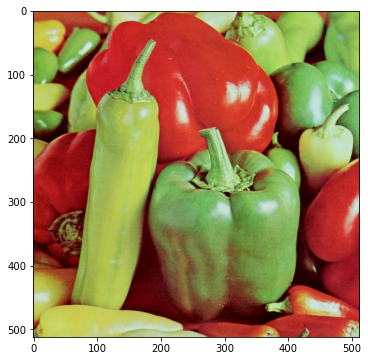

In [6]:
I = pimg.imread('4.2.07.tiff')
plt.figure(figsize=(6,6))
plt.imshow(I)
plt.show()

In [7]:
X = np.transpose(I.reshape(-1,3))

NClusters = 7
Epsilon = 0.0005

Algorithm = KMeans(NClusters)
Loss,Labels,Centroids = Algorithm.fit(X,Epsilon)
print("---------------------------------------")
print ("Centroids at Convergence:\n", Centroids)


Epoch/Iteration: 0       Error in Centroids: 317.03175286225235        Distortion Measure: 34712713.06885065
Epoch/Iteration: 1       Error in Centroids: 110.38618959628096        Distortion Measure: 13281348.892928543
Epoch/Iteration: 2       Error in Centroids: 46.382394489754226        Distortion Measure: 11084113.405945417
Epoch/Iteration: 3       Error in Centroids: 83.6980798560011          Distortion Measure: 10656613.159986878
Epoch/Iteration: 4       Error in Centroids: 71.65307198121538         Distortion Measure: 8332429.228766036
Epoch/Iteration: 5       Error in Centroids: 36.01389373101244         Distortion Measure: 7207018.469561991
Epoch/Iteration: 6       Error in Centroids: 19.9323061263839          Distortion Measure: 6933324.299082167
Epoch/Iteration: 7       Error in Centroids: 12.483995178622912        Distortion Measure: 6851775.920276789
Epoch/Iteration: 8       Error in Centroids: 8.409229567215068         Distortion Measure: 6821712.79345802
Epoch/Iteration: 

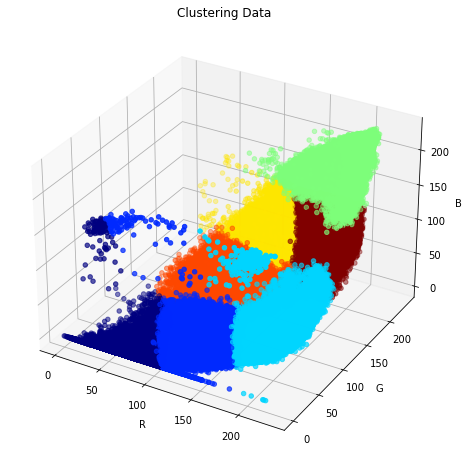

In [8]:
Algorithm.PlotClusters(X,Labels)

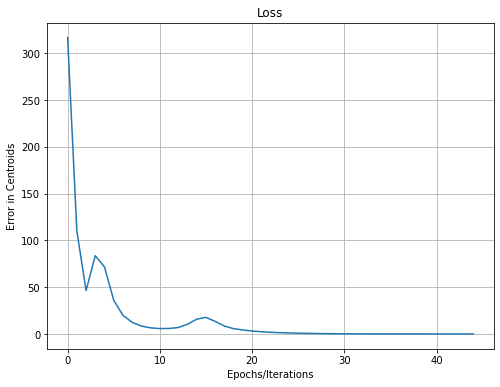

In [9]:
Algorithm.LossPlot(Loss)

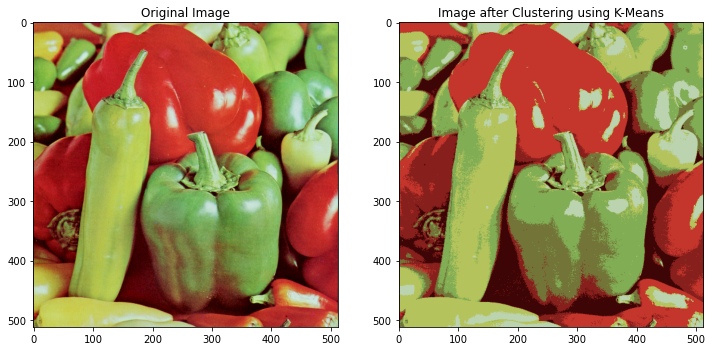

In [10]:
Y = np.transpose(Algorithm.ClusteredOutput(X,Labels,Centroids))
J = np.round(np.reshape(Y,I.shape)).astype(int)

plt.figure(figsize=(12,24))

plt.subplot(1,2,1)
plt.imshow(I)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(J)
plt.title('Image after Clustering using K-Means')

plt.show()
